<a href="https://colab.research.google.com/github/mochradja/DataScience/blob/main/Amazon_2003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
url = "https://gist.githubusercontent.com/coderitma/c1df024de2ca2ef895b79ab21a55ee78/raw/50b7dc48345618e3d7d111347bde02cd6b287ea7/data_sales_week3.csv"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(url)
# df.YEAR_ID.unique()
df = df[df.YEAR_ID == 2003]
df.drop(['ADDRESSLINE2', 'STATE', 'POSTALCODE', 'TERRITORY', 'CONTACTLASTNAME'], axis=1, inplace=True)

df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df.rename(columns={'PRICEEACH': 'PRICE', 'PRODUCTLINE': 'CATEGORY'}, inplace=True)

df

,ORDERNUMBER,QUANTITYORDERED,PRICE,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,CATEGORY,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,France,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,France,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,USA,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,USA,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,10153,50,60.06,4,3003.00,2003-09-28,Shipped,3,9,2003,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,Spain,Diego,Medium
2802,10167,38,48.59,15,1846.42,2003-10-23,Cancelled,4,10,2003,Ships,54,S72_3212,Scandinavian Gift Ideas,0695-34 6555,?kergatan 24,Boras,Sweden,Maria,Small
2803,10177,40,50.23,6,2009.20,2003-11-07,Shipped,4,11,2003,Ships,54,S72_3212,CAF Imports,+34 913 728 555,"Merchants House, 27-30 Merchant's Quay",Madrid,Spain,Jesus,Small
2804,10185,28,64.43,6,1804.04,2003-11-14,Shipped,4,11,2003,Ships,54,S72_3212,Mini Creations Ltd.,5085559555,4575 Hillside Dr.,New Bedford,USA,Wing C,Small


In [ ]:
df['CATEGORY'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

## Insight 01

In [ ]:
sales = df['SALES'].groupby(df.MONTH_ID).agg('sum').reset_index()
sales.sort_values('SALES', ascending=False)

,MONTH_ID,SALES
10,11,1029837.66
9,10,568290.97
8,9,263973.36
11,12,261876.46
3,4,201609.55
7,8,197809.30
4,5,192673.11
6,7,187731.88
2,3,174504.90
5,6,168082.56


In [ ]:
sales_max_min = sales[(sales['SALES'] == sales['SALES'].max()) | ( sales['SALES'] == sales['SALES'].min())]
sales_max_min

,MONTH_ID,SALES
0,1,129753.60
10,11,1029837.66


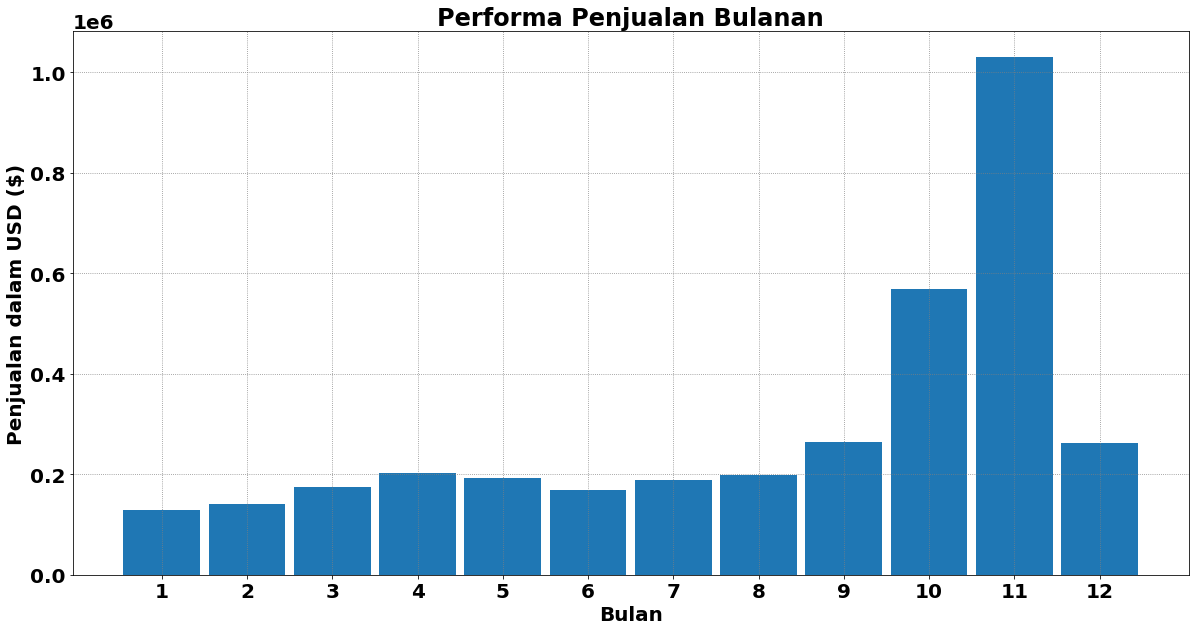

In [ ]:
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 20, 'font.weight': 'bold'})

plt.bar(sales.MONTH_ID, sales.SALES, width=0.9)

plt.xticks(sales.MONTH_ID)
plt.xlabel("Bulan", fontdict={'fontweight': 'bold'})
plt.ylabel("Penjualan dalam USD ($)", fontdict={'fontweight': 'bold'})
plt.title("Performa Penjualan Bulanan", fontdict={'fontweight': 'bold'})
plt.grid(ls=':', color='grey')
plt.show()

## Insight 02

Ada berapa barang yang out (QUANTITYORDERED) berdasarkan statusnya (STATUS)?

In [ ]:
data = df['QUANTITYORDERED'].groupby(df.STATUS).agg(['count', 'sum'])
data = data.reset_index()
data

,STATUS,count,sum
0,Cancelled,16,550
1,Resolved,8,288
2,Shipped,976,33774


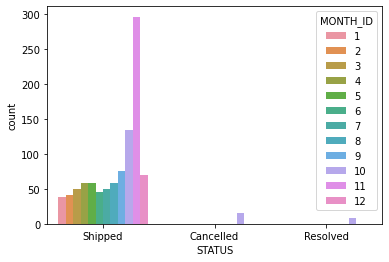

In [ ]:
sns.countplot(x='STATUS', data=df, hue='MONTH_ID')
plt.show()

## Insight 03
Negara (COUNTRY) mana yang penjualannya (SALES) paling banyak (max) dan paling dikit (min).

In [ ]:
data = df['SALES'].groupby(df.COUNTRY).agg(['sum', 'count']).reset_index()
data_max_min = data[(data['sum'] == data['sum'].max()) | (data['sum'] == data['sum'].min())]
data_max_min

,COUNTRY,sum,count
2,Belgium,3348.46,2
15,USA,1305147.88,367


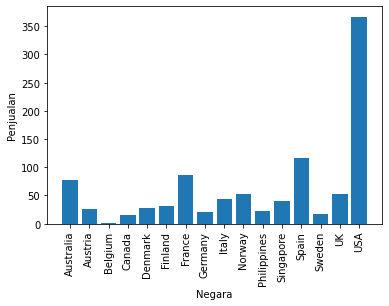

In [ ]:
plt.bar(data.COUNTRY, data['count'])
plt.xticks(data.COUNTRY, rotation=90)
plt.ylabel('Penjualan')
plt.xlabel('Negara')
plt.show()

## Data Insight 04
Trafik penjualan per hari untuk tim marketing.

In [ ]:
df['days'] = df['ORDERDATE'].dt.day
data = df['QUANTITYORDERED'].groupby(df.days).agg(['sum'])
data

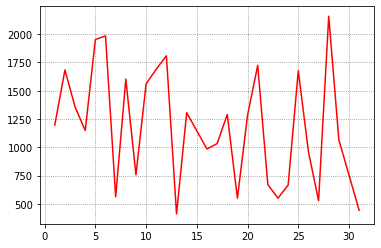

In [ ]:
plt.plot(data.index, data['sum'], color='red')
plt.grid(ls=':', color='grey')

## Insight 5
Kategori dari setiap negara dengan pivot.

In [ ]:
data = df['QUANTITYORDERED'].groupby([df.COUNTRY, df.CATEGORY]).agg('sum').reset_index()
data.pivot(columns='CATEGORY', index='COUNTRY', values='QUANTITYORDERED').fillna(0)

CATEGORY,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
COUNTRY,,,,,,,
Australia,763.0,431.0,235.0,0.0,33.0,91.0,961.0
Austria,248.0,0.0,166.0,113.0,0.0,203.0,142.0
Belgium,0.0,0.0,0.0,0.0,27.0,0.0,20.0
Canada,225.0,0.0,0.0,0.0,0.0,98.0,177.0
Denmark,478.0,0.0,0.0,230.0,38.0,0.0,157.0
Finland,280.0,0.0,246.0,76.0,0.0,384.0,100.0
France,1210.0,864.0,218.0,75.0,0.0,467.0,137.0
Germany,525.0,43.0,0.0,0.0,0.0,0.0,142.0
Italy,304.0,0.0,460.0,71.0,60.0,23.0,562.0


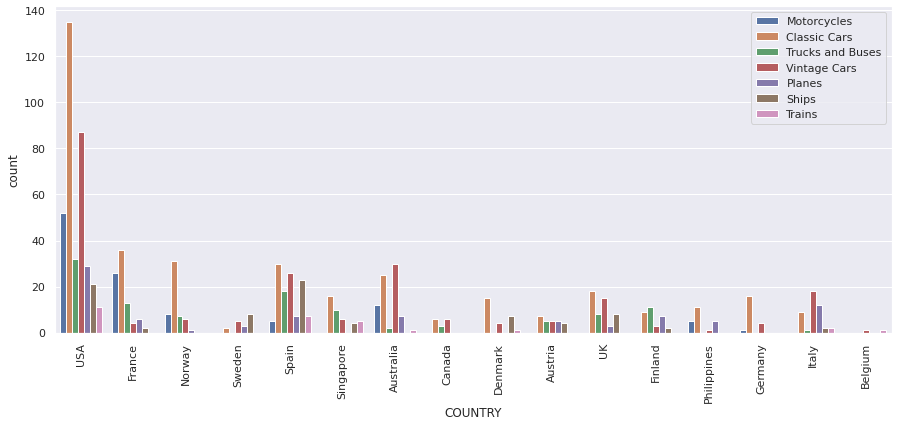

In [ ]:
sns.set(rc={'figure.figsize': (15, 6)})
plt.xticks(rotation=90)

sns.countplot(x='COUNTRY', data=df, hue='CATEGORY')
plt.legend(loc='upper right')
plt.show()

## Insight 6
Tanggal tersibuk lalulintas transaksi.

In [ ]:
data = df[df['COUNTRY'] == 'USA'][['QUANTITYORDERED', 'SALES']].groupby(df.ORDERDATE).agg('sum').reset_index()
data

,ORDERDATE,QUANTITYORDERED,SALES
0,2003-01-06,151,12133.25
1,2003-01-10,80,6864.05
2,2003-02-24,229,25783.76
3,2003-03-10,212,27398.82
4,2003-03-25,217,18695.58
5,2003-03-26,143,12398.56
6,2003-04-04,210,24777.41
7,2003-05-21,448,33847.62
8,2003-06-03,540,68462.15
9,2003-06-16,317,27628.30


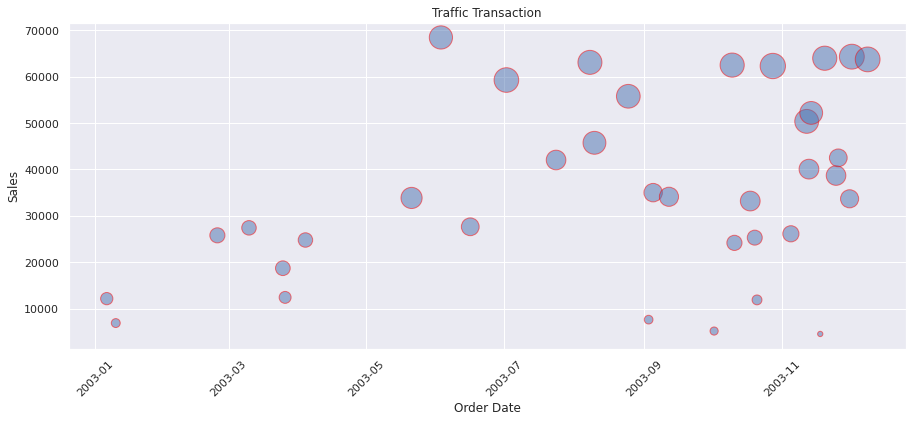

In [ ]:
# Draw the scatter diagram
plt.scatter(
    data['ORDERDATE'], data['SALES'], 
    s=data['QUANTITYORDERED'],
    cmap="Blues", edgecolors="red", alpha=0.5)


# Add X Label on X-axis
plt.xlabel("Order Date")

# Add Y Label on X-axis
plt.ylabel("Sales")

# Add title to graph
plt.title("Traffic")

# rotate x label for clear visualization
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Data Insight Q01

In [ ]:
df_usa = df[df.COUNTRY=='USA']
df_nyc = df_usa[df_usa.CITY == 'NYC']

df_nyc['QUANTITYORDERED'].groupby(df_nyc.CATEGORY).agg('sum').reset_index()

,CATEGORY,QUANTITYORDERED
0,Classic Cars,932
1,Motorcycles,229
2,Trains,75
3,Trucks and Buses,233
4,Vintage Cars,434


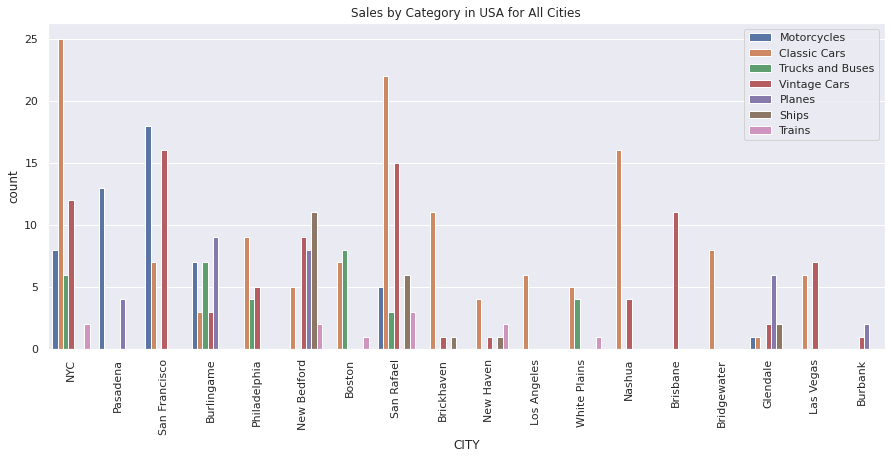

In [ ]:
sns.countplot(x='CITY', data=df_usa, hue='CATEGORY')
plt.xticks(rotation=90)
plt.title('Sales by Category in USA for All Cities')
plt.legend(loc='upper right')
plt.show()